Importing the Dependencies

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Pre-Processing

In [9]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/spam_ham_dataset.csv')

In [10]:
print(raw_mail_data)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

Data Cleaning

In [11]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [12]:
mail_data = mail_data.applymap(lambda x: x.replace('\r\n', '') if isinstance(x, str) else x)

In [13]:
mail_data = mail_data.applymap(lambda x: x.replace('#', '') if isinstance(x, str) else x)

In [14]:
mail_data = mail_data.applymap(lambda x: x.replace('/', '') if isinstance(x, str) else x)

In [15]:
mail_data = mail_data.applymap(lambda x: x.replace('http\S+', '') if isinstance(x, str) else x)

In [16]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter : 988291this ...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001( see att...",0
2,3624,ham,"Subject: neon retreatho ho ho , we ' re around...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springsthis deal is to bo...,0


In [17]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5171, 4)

Label Encoding

In [18]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['label'] == 'spam', 'label',] = 0
mail_data.loc[mail_data['label'] == 'ham', 'label',] = 1

spam  -  0

ham  -  1

In [19]:
# separating the data as texts and label

X = mail_data['text']

Y = mail_data['label']

In [20]:
# Check for the class balance
mail_data['label'].value_counts(normalize=True)

1    0.710114
0    0.289886
Name: label, dtype: float64

<Axes: >

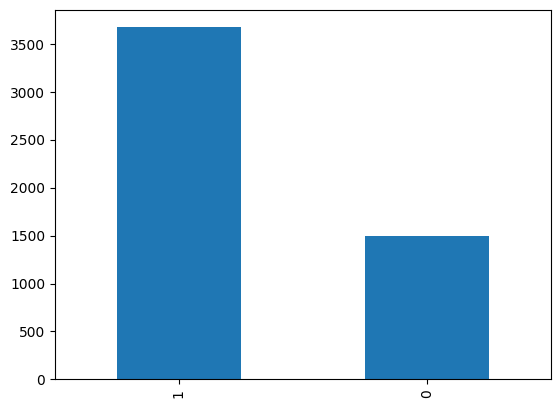

In [21]:
# plot the label counts
mail_data['label'].value_counts().plot(kind='bar')

In [22]:
print(X)

0       Subject: enron methanol ; meter  : 988291this ...
1       Subject: hpl nom for january 9 , 2001( see att...
2       Subject: neon retreatho ho ho , we ' re around...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springsthis deal is to bo...
                              ...                        
5166    Subject: put the 10 on the ftthe transport vol...
5167    Subject: 3  4  2000 and following nomshpl can ...
5168    Subject: calpine daily gas nomination>>julie ,...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alertdear va...
Name: text, Length: 5171, dtype: object


In [23]:
print(Y)

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: label, Length: 5171, dtype: object


Splitting the data into training data & test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [25]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


Feature Extraction

In [26]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [27]:
print(Y_train)

2209    1
2000    1
5030    1
1376    1
1564    0
       ..
789     0
968     0
1667    1
3321    1
1688    0
Name: label, Length: 4136, dtype: int64


In [28]:
print(X_train)

2209    Subject: hplc to wellheaddaren here is the lis...
2000    Subject: mobil chemical - hpl meter  1256 - ex...
5030    Subject: revised nom 5  5 - eastrans ; revised...
1376    Subject: re : exxon company , usa global  9603...
1564    Subject: your pharmacy nxwant a cheap pain kil...
                              ...                        
789     Subject: incr ' ease yo ' ur man ' hood by 4 -...
968     Subject: subscribers receive first notice on r...
1667    Subject: neon for march 28here is the neon les...
3321    Subject: re : first delivery - pure resources ...
1688    Subject: enhance your chest sizeemail is loadi...
Name: text, Length: 4136, dtype: object


In [29]:
print(X_train_features)

  (0, 6127)	0.15938878673071707
  (0, 1168)	0.15938878673071707
  (0, 43082)	0.09484550107349092
  (0, 6148)	0.15938878673071707
  (0, 1186)	0.15938878673071707
  (0, 4790)	0.15938878673071707
  (0, 1069)	0.15938878673071707
  (0, 36898)	0.10939991794344611
  (0, 4175)	0.15938878673071707
  (0, 1158)	0.15938878673071707
  (0, 24018)	0.129679595744087
  (0, 4529)	0.15938878673071707
  (0, 1159)	0.15938878673071707
  (0, 45424)	0.08350469340277912
  (0, 27594)	0.04680151978883516
  (0, 4250)	0.15938878673071707
  (0, 1154)	0.15938878673071707
  (0, 27664)	0.1391091089300762
  (0, 6133)	0.15938878673071707
  (0, 1596)	0.15938878673071707
  (0, 44600)	0.15938878673071707
  (0, 4698)	0.15938878673071707
  (0, 2335)	0.1519041610473431
  (0, 4406)	0.15938878673071707
  (0, 38900)	0.4882958571669397
  :	:
  (4135, 52436)	0.07191350570457766
  (4135, 57687)	0.08129320044445296
  (4135, 23841)	0.07004715424238586
  (4135, 10038)	0.0842380845602327
  (4135, 14474)	0.0600068049676827
  (4135, 6061

In [30]:
X_train.shape, X_test.shape

((4136,), (1035,))

Training the Model

Logistic Regression

In [31]:
model = LogisticRegression()

In [32]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [33]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [34]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9978239845261122


In [35]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [36]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9777777777777777


Building a Predictive System

In [37]:
input_mail = ["ehronline web address changethis message is intended for ehronline users only . the change involves adding the  I've been searching for the right words to thank you for this breather."]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail
